In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [10]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

# Importing Images

In [11]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\LENOVO\OneDrive\Desktop\Project\corn and maize disease\data", 
    shuffle = True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)                                                         

Found 4188 files belonging to 3 classes.


# Spliting the data


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"C:\Users\LENOVO\OneDrive\Desktop\Project\corn and maize disease\data\train",
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        r"C:\Users\LENOVO\OneDrive\Desktop\Project\corn and maize disease\data\validation",
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        r"C:\Users\LENOVO\OneDrive\Desktop\Project\corn and maize disease\data\test",
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False)


Found 3366 images belonging to 4 classes.
Found 408 images belonging to 4 classes.
Found 414 images belonging to 4 classes.


# Visualizing some images

In [13]:
class_name= ["Blight", "Common_Rust", "Gray_leaf_spot", "Healty"]
class_name

['Blight', 'Common_Rust', 'Gray_leaf_spot', 'Healty']

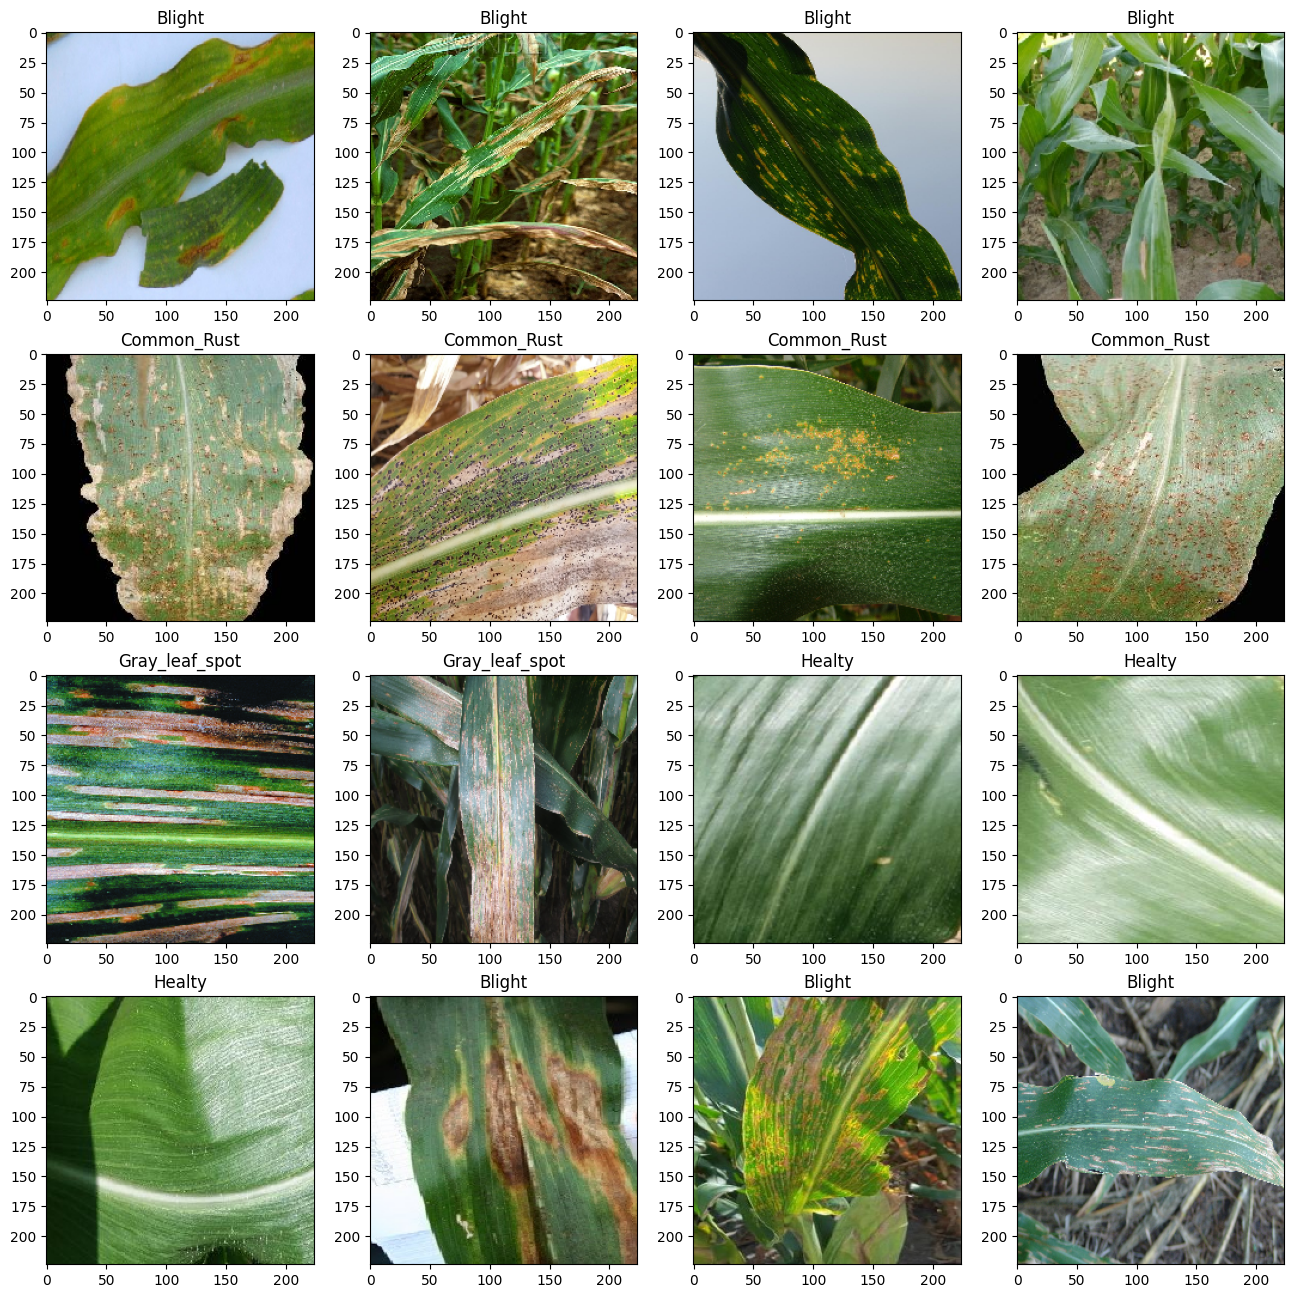

In [14]:
plt.figure(figsize=(16, 16))
for i in range(1, 17):
  plt.subplot(4, 4, i)
  img, label = test_generator.next() 
  plt.imshow(img[i])
  plt.title(class_name[tf.argmax(label[i],axis=0).numpy()])
plt.show()

In [15]:
img, label = test_generator.next()
img[0].shape

(224, 224, 3)

# Using VGG16 

In [77]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [78]:
from tensorflow.keras.optimizers import Adam
base_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
flatten_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_9  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_16 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 14716740 (56.14 MB)
Trainable params: 14716740 (56.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5


105/105 [==============================] - 940s 9s/step - loss: 1.7624 - acc: 0.5208 - val_loss: 0.5186 - val_acc: 0.8382
Epoch 2/5
105/105 [==============================] - 842s 8s/step - loss: 0.5806 - acc: 0.7698 - val_loss: 0.7424 - val_acc: 0.8333
Epoch 3/5
105/105 [==============================] - 840s 8s/step - loss: 0.4709 - acc: 0.8143 - val_loss: 0.3264 - val_acc: 0.8505
Epoch 4/5
105/105 [==============================] - 888s 8s/step - loss: 0.3801 - acc: 0.8372 - val_loss: 0.3343 - val_acc: 0.8260
Epoch 5/5
105/105 [==============================] - 843s 8s/step - loss: 0.3156 - acc: 0.8565 - val_loss: 0.3150 - val_acc: 0.8652


In [24]:
model.save("VGG16_cornAnd_Maize_diseas.h5")
print("Saved model to disk")

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model to disk


In [108]:
model = models.load_model('VGG16_cornAnd_Maize_diseas.h5')
print("Model is loaded")

Model is loaded


In [109]:
model.save_weights('cnn_classification.h5')

In [110]:
model.load_weights('cnn_classification.h5')

In [111]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

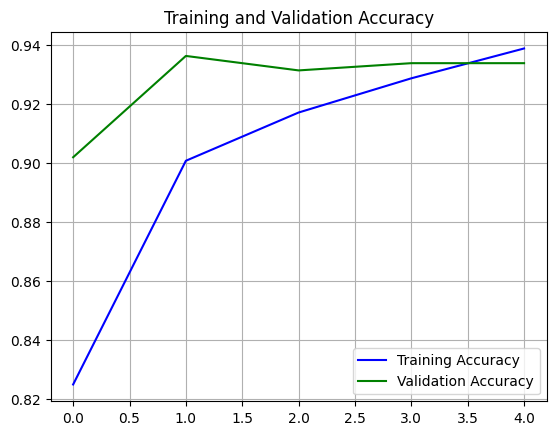

<Figure size 640x480 with 0 Axes>

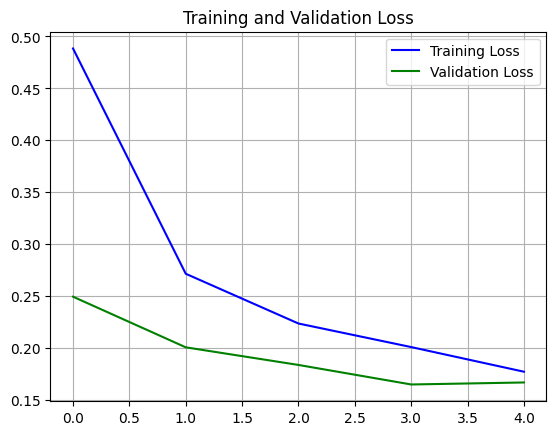

In [112]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [113]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20088\402917152.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


12/12 [==============================] - 83s 6s/step
No of errors = 144/414


In [114]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

65.21739130434783

# Craeting confusion matrix for VGG16

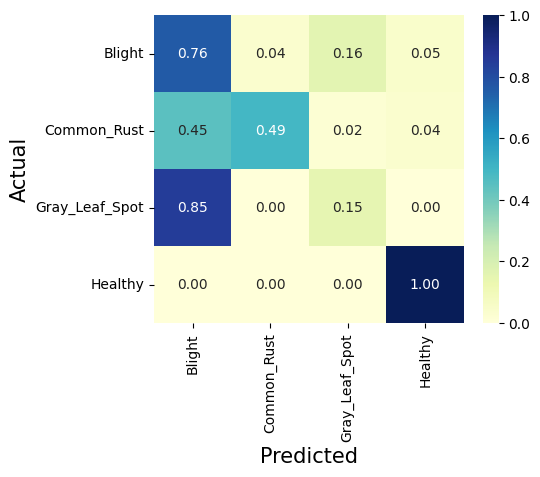

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [116]:
# classification report of VGG16
from sklearn.metrics import classification_report
print (classification_report(ground_truth, predicted_classes, target_names=label2index))

                precision    recall  f1-score   support

        Blight       0.43      0.76      0.55       108
   Common_Rust       0.94      0.49      0.65       132
Gray_Leaf_Spot       0.31      0.15      0.20        60
       Healthy       0.92      1.00      0.96       114

      accuracy                           0.65       414
     macro avg       0.65      0.60      0.59       414
  weighted avg       0.71      0.65      0.64       414



# Inception model

In [4]:
from keras import applications

## Loading InceptionV3 model
base_model = applications.InceptionV3(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalizat

In [6]:
# Add BatchNormalization after the Inception layer
x = layers.BatchNormalization()(base_model.output)

# Additional layers (modify as needed)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(4, activation='softmax')(x)

# Create the model using Functional API
model = models.Model(inputs=base_model.input, outputs=x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalization_1[

In [26]:
flatten_layer = layers.GlobalAveragePooling2D()
dense_layer_1 = layers.Dense(63, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    dense_layer_1,
    dense_layer_2,
    flatten_layer,
    prediction_layer
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 dense_4 (Dense)             (None, 2, 2, 63)          129087    
                                                                 
 dense_5 (Dense)             (None, 2, 2, 32)          2048      
                                                                 
 global_average_pooling2d_4  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 4)                 132       
                                                                 
Total params: 21934051 (83.67 MB)
Trainable params: 131267 (512.76 KB)
Non-trainable params: 21802784 (83.17 MB)
_______

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5
105/105 [==============================] - 70s 617ms/step - loss: 0.3875 - acc: 0.8461 - val_loss: 0.2227 - val_acc: 0.9216
Epoch 2/5
105/105 [==============================] - 63s 598ms/step - loss: 0.2042 - acc: 0.9207 - val_loss: 0.2276 - val_acc: 0.9020
Epoch 3/5
105/105 [==============================] - 63s 596ms/step - loss: 0.1533 - acc: 0.9400 - val_loss: 0.1545 - val_acc: 0.9412
Epoch 4/5
105/105 [==============================] - 63s 600ms/step - loss: 0.1312 - acc: 0.9507 - val_loss: 0.1490 - val_acc: 0.9387
Epoch 5/5
105/105 [==============================] - 63s 596ms/step - loss: 0.0973 - acc: 0.9646 - val_loss: 0.1962 - val_acc: 0.9142


In [28]:
model.save("InceptionNet_cornAnd_maize_deseas.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
model = models.load_model('InceptionNet_cornAnd_maize_deseas.h5')
print("Model is loaded")

Model is loaded


In [30]:
model.save_weights('incep_classify.h5')

In [31]:
model.load_weights('incep_classify.h5')

In [32]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

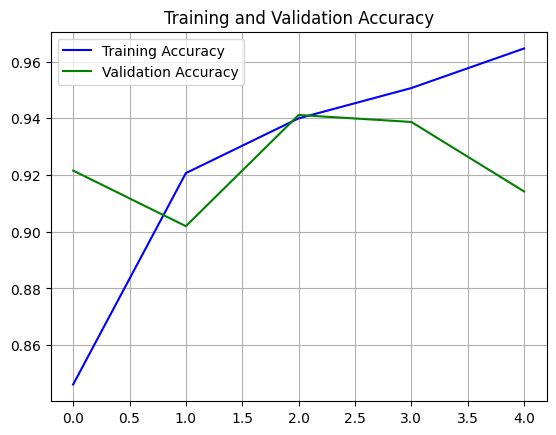

<Figure size 640x480 with 0 Axes>

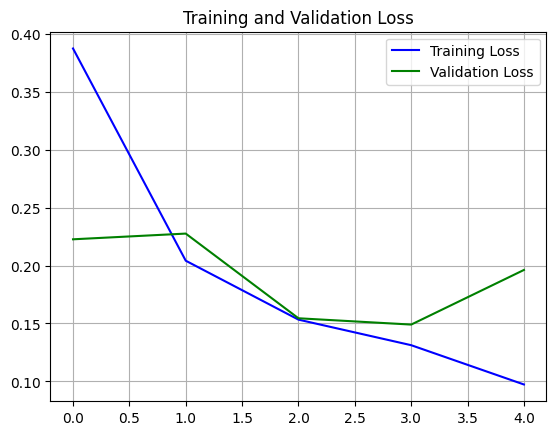

In [33]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [40]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())

predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21164\3363806972.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


12/12 [==============================] - 8s 591ms/step
No of errors = 138/414


In [41]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

66.66666666666666

# Confusion matrix for Inception model 

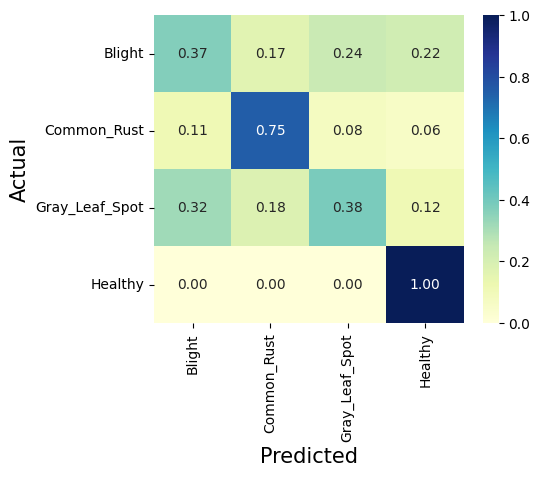

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [37]:
# classification report for Inception Model
from sklearn.metrics import classification_report
print (classification_report(ground_truth, predicted_classes, target_names=label2index))

                precision    recall  f1-score   support

        Blight       0.54      0.37      0.44       108
   Common_Rust       0.77      0.75      0.76       132
Gray_Leaf_Spot       0.39      0.38      0.39        60
       Healthy       0.75      1.00      0.85       114

      accuracy                           0.67       414
     macro avg       0.61      0.63      0.61       414
  weighted avg       0.65      0.67      0.65       414



# MobileNet model

In [53]:
from keras import applications

## Loading Mobilenet model
base_model = applications.MobileNetV2(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[

In [120]:
flatten_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 2, 2, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dense_22 (Dense)            (None, 4)                 6148      
                                                                 
Total params: 54342884 (207.30 MB)
Trainable params: 6148 (24.02 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [55]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5
105/105 [==============================] - 34s 291ms/step - loss: 0.4745 - acc: 0.8336 - val_loss: 0.1953 - val_acc: 0.9485
Epoch 2/5
105/105 [==============================] - 29s 279ms/step - loss: 0.2090 - acc: 0.9293 - val_loss: 0.1440 - val_acc: 0.9534
Epoch 3/5
105/105 [==============================] - 29s 280ms/step - loss: 0.1721 - acc: 0.9415 - val_loss: 0.1262 - val_acc: 0.9510
Epoch 4/5
105/105 [==============================] - 30s 283ms/step - loss: 0.1483 - acc: 0.9486 - val_loss: 0.1099 - val_acc: 0.9681
Epoch 5/5
105/105 [==============================] - 30s 282ms/step - loss: 0.1350 - acc: 0.9519 - val_loss: 0.1007 - val_acc: 0.9632


In [56]:
model.save("MobileNet_cornAnd_maize_deseas.h5")
print("Saved model to disk")

Saved model to disk


In [42]:
model = models.load_model('MobileNet_cornAnd_maize_deseas.h5')
print("Model is loaded")

Model is loaded


In [45]:
model.save_weights('mobileNet_classify.h5')

In [46]:
model.load_weights('mobileNet_classify.h5')

In [47]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

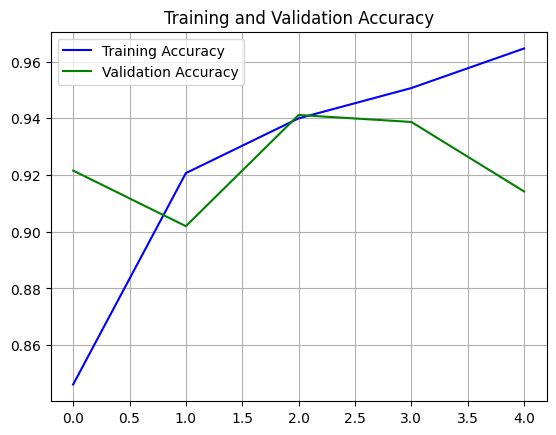

<Figure size 640x480 with 0 Axes>

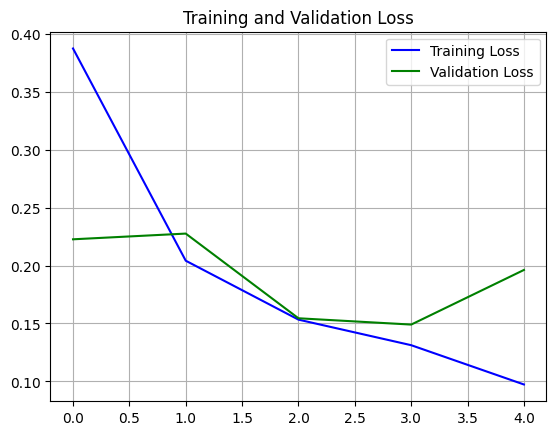

In [48]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [49]:
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21164\2960916275.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


12/12 [==============================] - 6s 379ms/step
No of errors = 119/414


In [50]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

71.25603864734299

# Confusion matrix for MobileNet model

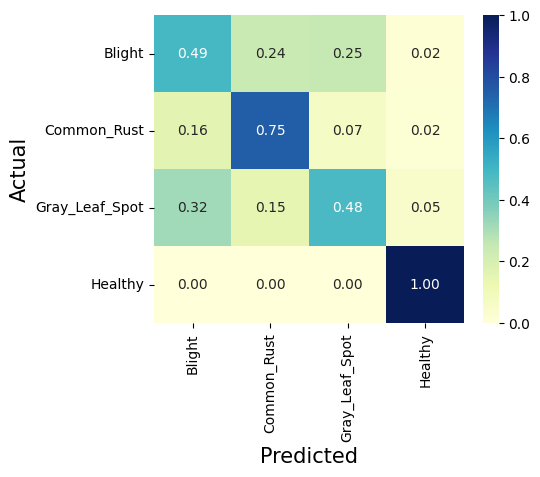

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [52]:
# classification report of Mobilenet model
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                precision    recall  f1-score   support

        Blight       0.57      0.49      0.53       108
   Common_Rust       0.74      0.75      0.74       132
Gray_Leaf_Spot       0.45      0.48      0.46        60
       Healthy       0.93      1.00      0.97       114

      accuracy                           0.71       414
     macro avg       0.67      0.68      0.68       414
  weighted avg       0.71      0.71      0.71       414

